## Observations and Insights 

In [ ]:
#OBSERVATIONS:
    
    #1.)Stelasyn has one less rat then all the other regimens. This drug regimens numbers may be skewed because of this.
    #2.)Capomulin had a downward trend in tumor size over time based on the line graph.
    #3.)Of the 4 regimens highlighted, Ramicane had the smallest final tumor size.

In [286]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_df=pd.merge(mouse_metadata, study_results, on=["Mouse ID"])
# Display the data table for preview
#merged_df.head()
merged_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [287]:
# Checking the number of mice.
mice= merged_df["Mouse ID"].nunique()
#mice= merged_df["Mouse ID"].count()
mice

249

In [219]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

clean_df=merged_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'])
clean_df.head(147)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
142,m957,Capomulin,Female,3,19,35,32.562839,1
143,m957,Capomulin,Female,3,19,40,32.947615,1
144,m957,Capomulin,Female,3,19,45,33.329098,1
145,c758,Ramicane,Male,9,17,0,45.000000,0


In [220]:
# Optional: Get all the data for the duplicate mouse ID. 



In [221]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.


In [222]:
# Checking the number of mice in the clean DataFrame.
mice2=clean_df[["Mouse ID"]].nunique()
mice2

Mouse ID    249
dtype: int64

## Summary Statistics

In [223]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

mean=clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median=clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
variance=clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
standard=clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
stderror=clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()


summary_stats=pd.DataFrame({ "Mean": mean,
                            "Median": median,
                            "Variance": variance,
                            "Standard Var" : standard,
                            "Standard Error": stderror
                           })


summary_stats

,Mean,Median,Variance,Standard Var,Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [284]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
                                
group= clean_df.groupby('Drug Regimen').agg(mean= ("Tumor Volume (mm3)", "mean"),
                                            median= ("Tumor Volume (mm3)", "median"),
                                            Variance= ("Tumor Volume (mm3)", "var"),
                                            Standard_Var= ("Tumor Volume (mm3)", "std"),
                                            Standard_Error= ("Tumor Volume (mm3)", "sem"),
                                                  
                                                  
                                                  )
group

,mean,median,Variance,Standard_Var,Standard_Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, '# of Mice')

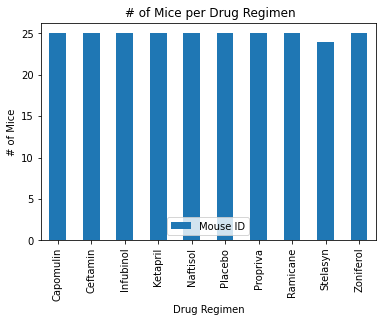

In [225]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.

regimencount=pd.DataFrame(clean_df.groupby("Drug Regimen")["Mouse ID"].nunique()).reset_index()

#regimencount.set_index("Drug Regimen")

drugmice=regimencount.plot.bar()
drugmice.set_xticklabels(regimencount["Drug Regimen"],rotation=90)


plt.title(" # of Mice per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Mice")

<function matplotlib.pyplot.show(*args, **kw)>

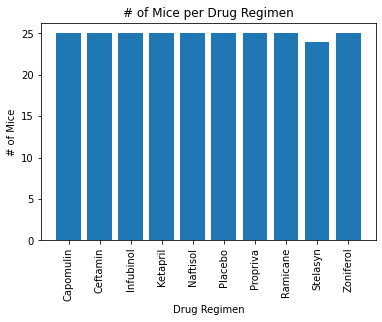

In [226]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.

ticks= regimencount["Drug Regimen"]
plt.bar(regimencount["Drug Regimen"], regimencount["Mouse ID"])
plt.xticks(ticks,rotation=90)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Mice")
plt.title("# of Mice per Drug Regimen")
plt.show

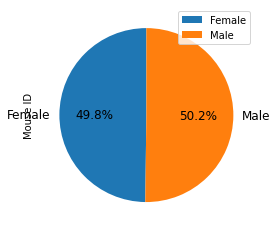

In [227]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

micegender= pd.DataFrame(clean_df.groupby("Sex")["Mouse ID"].nunique()).reset_index()

micegender.plot(kind='pie', y = "Mouse ID", autopct='%1.1f%%', 
 startangle=90, shadow=False, labels=micegender['Sex'], legend = True, fontsize=12)

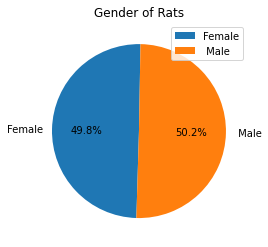

In [228]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

micegender2=(clean_df.groupby("Sex")["Mouse ID"].nunique()).tolist()
#micegender2
labels= ["Female"," Male"]


plt.pie(micegender2,  labels=labels, autopct="%1.1f%%", startangle=89)
plt.title("Gender of Rats")
plt.legend()

## Quartiles, Outliers and Boxplots

In [229]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

tumor_df=clean_df.loc[(clean_df["Drug Regimen"] == "Capomulin") | (clean_df["Drug Regimen"] == "Ramicane") | (clean_df["Drug Regimen"] == "Infubinol") | (clean_df["Drug Regimen"] == "Ceftamin"), :]
tumor_df= tumor_df.sort_values("Timepoint", ascending = False)
tumor_df = tumor_df.drop_duplicates(subset="Mouse ID", keep='first')

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged2_df=pd.merge(clean_df, tumor_df, on=["Mouse ID"])
merged2_df= merged2_df.drop(columns=['Sex_y', 'Age_months_y', 'Drug Regimen_y', 'Timepoint_y', 'Metastatic Sites_y', 'Weight (g)_y'])
merged2_df=merged2_df.rename(columns={'Drug Regimen_x': 'Drug Regimen', 'Sex_x': 'Sex', 'Age_months_x': 'Age_months', 'Weight (g)_x': 'Weight (g)', 'Timepoint_x': "Timepoint", 'Tumor Volume (mm3)_x': 'Tumor Volume (mm3)', 'Metastatic Sites_x': 'Metastatic Sites', 'Tumor Volume (mm3)_y': "Final Tumor Volume"})
merged2_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Final Tumor Volume
0,k403,Ramicane,Male,21,16,0,45.000000,0,22.050126
1,k403,Ramicane,Male,21,16,5,38.825898,0,22.050126
2,k403,Ramicane,Male,21,16,10,35.014271,1,22.050126
3,k403,Ramicane,Male,21,16,15,34.223992,1,22.050126
4,k403,Ramicane,Male,21,16,20,32.997729,1,22.050126


In [230]:
# Put treatments into a list for for loop (and later for plot labels)

treatments= ["Capomulin", "Ramicane", "Infubinol", "Ceftamin" ]

# Create empty list to fill with tumor vol data (for plotting)
drugs=[]


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles= merged2_df["Final Tumor Volume"].quantile([0.25,0.5,0.75])
    
first_quartile= quartiles[0.25]
second_quartile= quartiles[0.5]
third_quartile= quartiles[0.75]
iqr= third_quartile- first_quartile
#iqr
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
merged3 = merged2_df.drop_duplicates(subset="Mouse ID", keep='first')    
   
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    
lower_bound= first_quartile - (1.5*iqr)
upper_bound= third_quartile + (1.5*iqr)
#print(lower_bound,upper_bound)

outliers=merged2_df.loc[(merged2_df["Final Tumor Volume"]>= upper_bound) | (merged2_df["Final Tumor Volume"] <= lower_bound),:]
outliers.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Final Tumor Volume


<function matplotlib.pyplot.show(*args, **kw)>

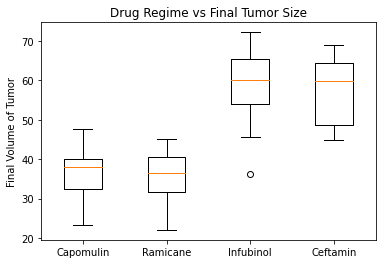

In [231]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
merged3_df=pd.DataFrame(merged3)

tumor_df = merged3_df.loc[:,['Drug Regimen', 'Final Tumor Volume']]
#tumor_df

capomulin = tumor_df[tumor_df["Drug Regimen"]== "Capomulin"]
capomulin2= capomulin["Final Tumor Volume"]
#capomulin2

ramicane = tumor_df[tumor_df["Drug Regimen"]== "Ramicane"]
ramicane2= ramicane["Final Tumor Volume"]

infubinol = tumor_df[tumor_df["Drug Regimen"]== "Infubinol"]
infubinol2= infubinol["Final Tumor Volume"]

ceftamin = tumor_df[tumor_df["Drug Regimen"]== "Ceftamin"]
ceftamin2= ceftamin["Final Tumor Volume"]

data= [capomulin2, ramicane2, infubinol2, ceftamin2]


#fig1,ax1=plt.subplots()
#ax1.boxplot(data)
#ax1.set_title("Drug Regimen vs Final Tumor Size")
#ax1.set_ylabel("Final Tumor Volume")
#plt.xticks([1,2,3,4][treatments], rotation=90)
#plt.show

plt.boxplot(data)
plt.xticks([1, 2, 3,4], ['Capomulin','Ramicane', 'Infubinol','Ceftamin'])
plt.ylabel("Final Volume of Tumor")
plt.title("Drug Regime vs Final Tumor Size")
plt.show

## Line and Scatter Plots

<function matplotlib.pyplot.show(*args, **kw)>

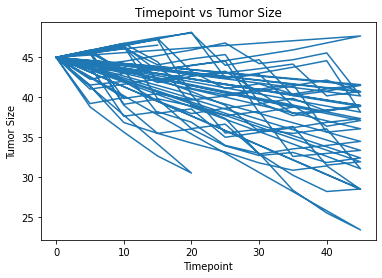

In [232]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
tumor2_df=clean_df.loc[(clean_df["Drug Regimen"] == "Capomulin"),:]

time_df= tumor2_df["Timepoint"]
tumorsize_df= tumor2_df["Tumor Volume (mm3)"]

plt.plot(time_df, tumorsize_df)
plt.ylabel("Tumor Size")
plt.xlabel("Timepoint")
plt.title("Timepoint vs Tumor Size")
plt.show



#tumor2_df

#time2_df= tumor2_df.set_index("Mouse ID")
#time_df

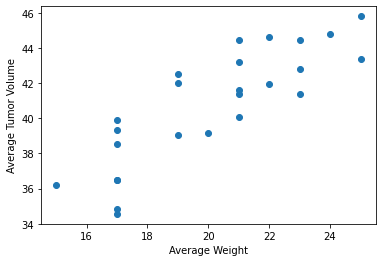

In [233]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
averagetumor = tumor2_df.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
#averagetumor

weight= tumor2_df.groupby("Mouse ID")["Weight (g)"].mean()
#tumor2_df
plt.scatter(weight,averagetumor)
plt.xlabel("Average Weight")
plt.ylabel("Average Tumor Volume")
plt.show()

## Correlation and Regression

In [234]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


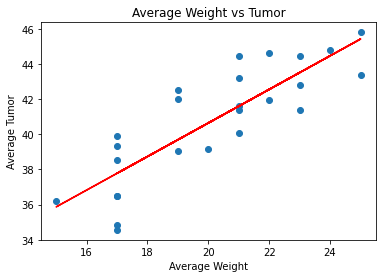

In [285]:
eq= "y =" + str(slope) + "x +" + str(intercept)
plt.scatter(weight,averagetumor)
plt.plot(weight,regress_value, color="red")
#plt.annotate(eq, (6,10), fontsize= 15)
plt.xlabel("Average Weight")
plt.ylabel("Average Tumor")
plt.title("Average Weight vs Tumor")
plt.show()



In [263]:
correlation= (st.pearsonr(weight,averagetumor)[0])
print(f" the correlation is {correlation}")

 the correlation is 0.8419363424694717


In [238]:
slope, intercept, rvalue, pvalue, stderr = linregress(weight,averagetumor)

In [240]:
regress_value= slope* weight + intercept
regress_value

Mouse ID
b128    42.549834
b742    41.595394
f966    37.777635
g288    39.686515
g316    42.549834
i557    44.458713
i738    40.640954
j119    43.504273
j246    41.595394
l509    41.595394
l897    39.686515
m601    37.777635
m957    39.686515
r157    45.413153
r554    37.777635
r944    45.413153
s185    37.777635
s710    43.504273
t565    37.777635
u364    37.777635
v923    41.595394
w150    43.504273
w914    41.595394
x401    35.868756
y793    37.777635
Name: Weight (g), dtype: float64

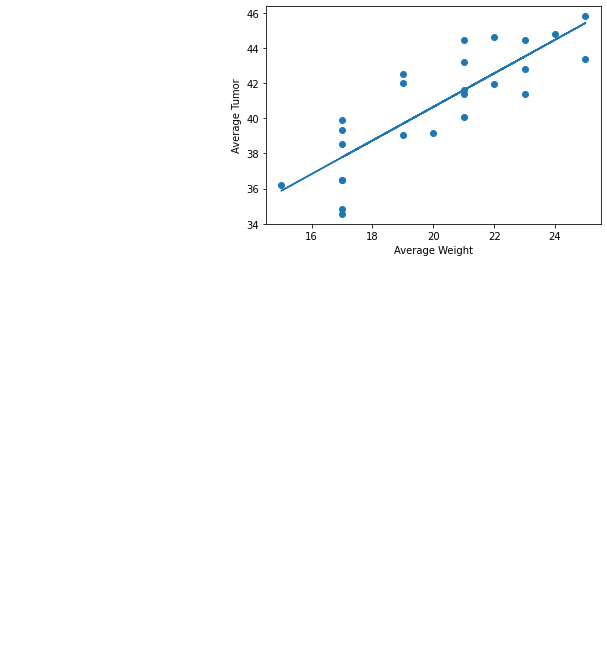

In [254]:
plt.scatter(weight,averagetumor)
plt.plot(weight,regress_value)
plt.annotate(eq, (6,10), fontsize= 15, color= 'red')
plt.xlabel("Average Weight")
plt.ylabel("Average Tumor")
plt.show()